In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Crop_recommendation.csv")
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
gbc = GradientBoostingClassifier(random_state=42)
hyperparameters = {
    "n_estimators": [x for x in range(1, 16)],
    "criterion": ["friedman_mse", "squared_error"],
    "max_depth": [x for x in range(1, 16)]
}
cv = GridSearchCV(estimator=gbc, param_grid=hyperparameters, cv=5, scoring="accuracy", n_jobs=-1)
cv.fit(x_train, y_train)
print("Best hyperparameters: ", cv.best_params_)


Best hyperparameters:  {'criterion': 'friedman_mse', 'max_depth': 4, 'n_estimators': 14}


In [8]:
best_model = cv.best_estimator_
y_pred = best_model.predict(x_test)
acc_score = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average="macro")
print("\n" + "="*50 + "\n")
print(f"Accuracy: {acc_score:.4f}")
print(f"Macro f1: {f1: .4f}")
print("\n" + "="*50 + "\n")



Accuracy: 0.9848
Macro f1:  0.9853




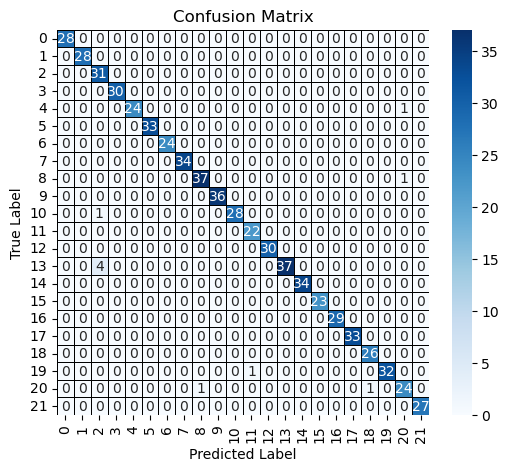

In [18]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", linewidths=0.5, linecolor="black")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()